In [55]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg
import colorsys

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']#,'DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_173','BS_175','BS_187','BS_188','BS_213','BS_214','TH_217','AE_235','AE_236','TH_237']
unuseddualanimals = ['BS_78']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28','DS_16','DS_17','DS_22','DS_13','DS_23']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'

current_version = 0 #June 22nd, 2023

ImportError: attempted relative import with no known parent package

In [3]:
animals = np.concatenate((dualanimalnames,['DS_15','DS_19']))

In [4]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for DS_27
Fetching files for DS_28
Fetching files for DS_17
Fetching files for DS_22
Fetching files for DS_13
Fetching files for DS_23
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\behavior\BS_103_11v4_opto.txt: No columns to parse from file
P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse from file
ERROR: MULTIPLE REVERSALS IN ANIMAL BS_179
P:\Behavioor\BS_191\behavior\BS_191_1v2.txt: No columns to parse from file
P:\Behavioor\BS_33\behavior\BS_33_9v1.txt: No columns to parse from file
P:\Behavioor\BS_33\behavior\BS_33_20v1_reversal.txt: No columns to parse fro

../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in lon

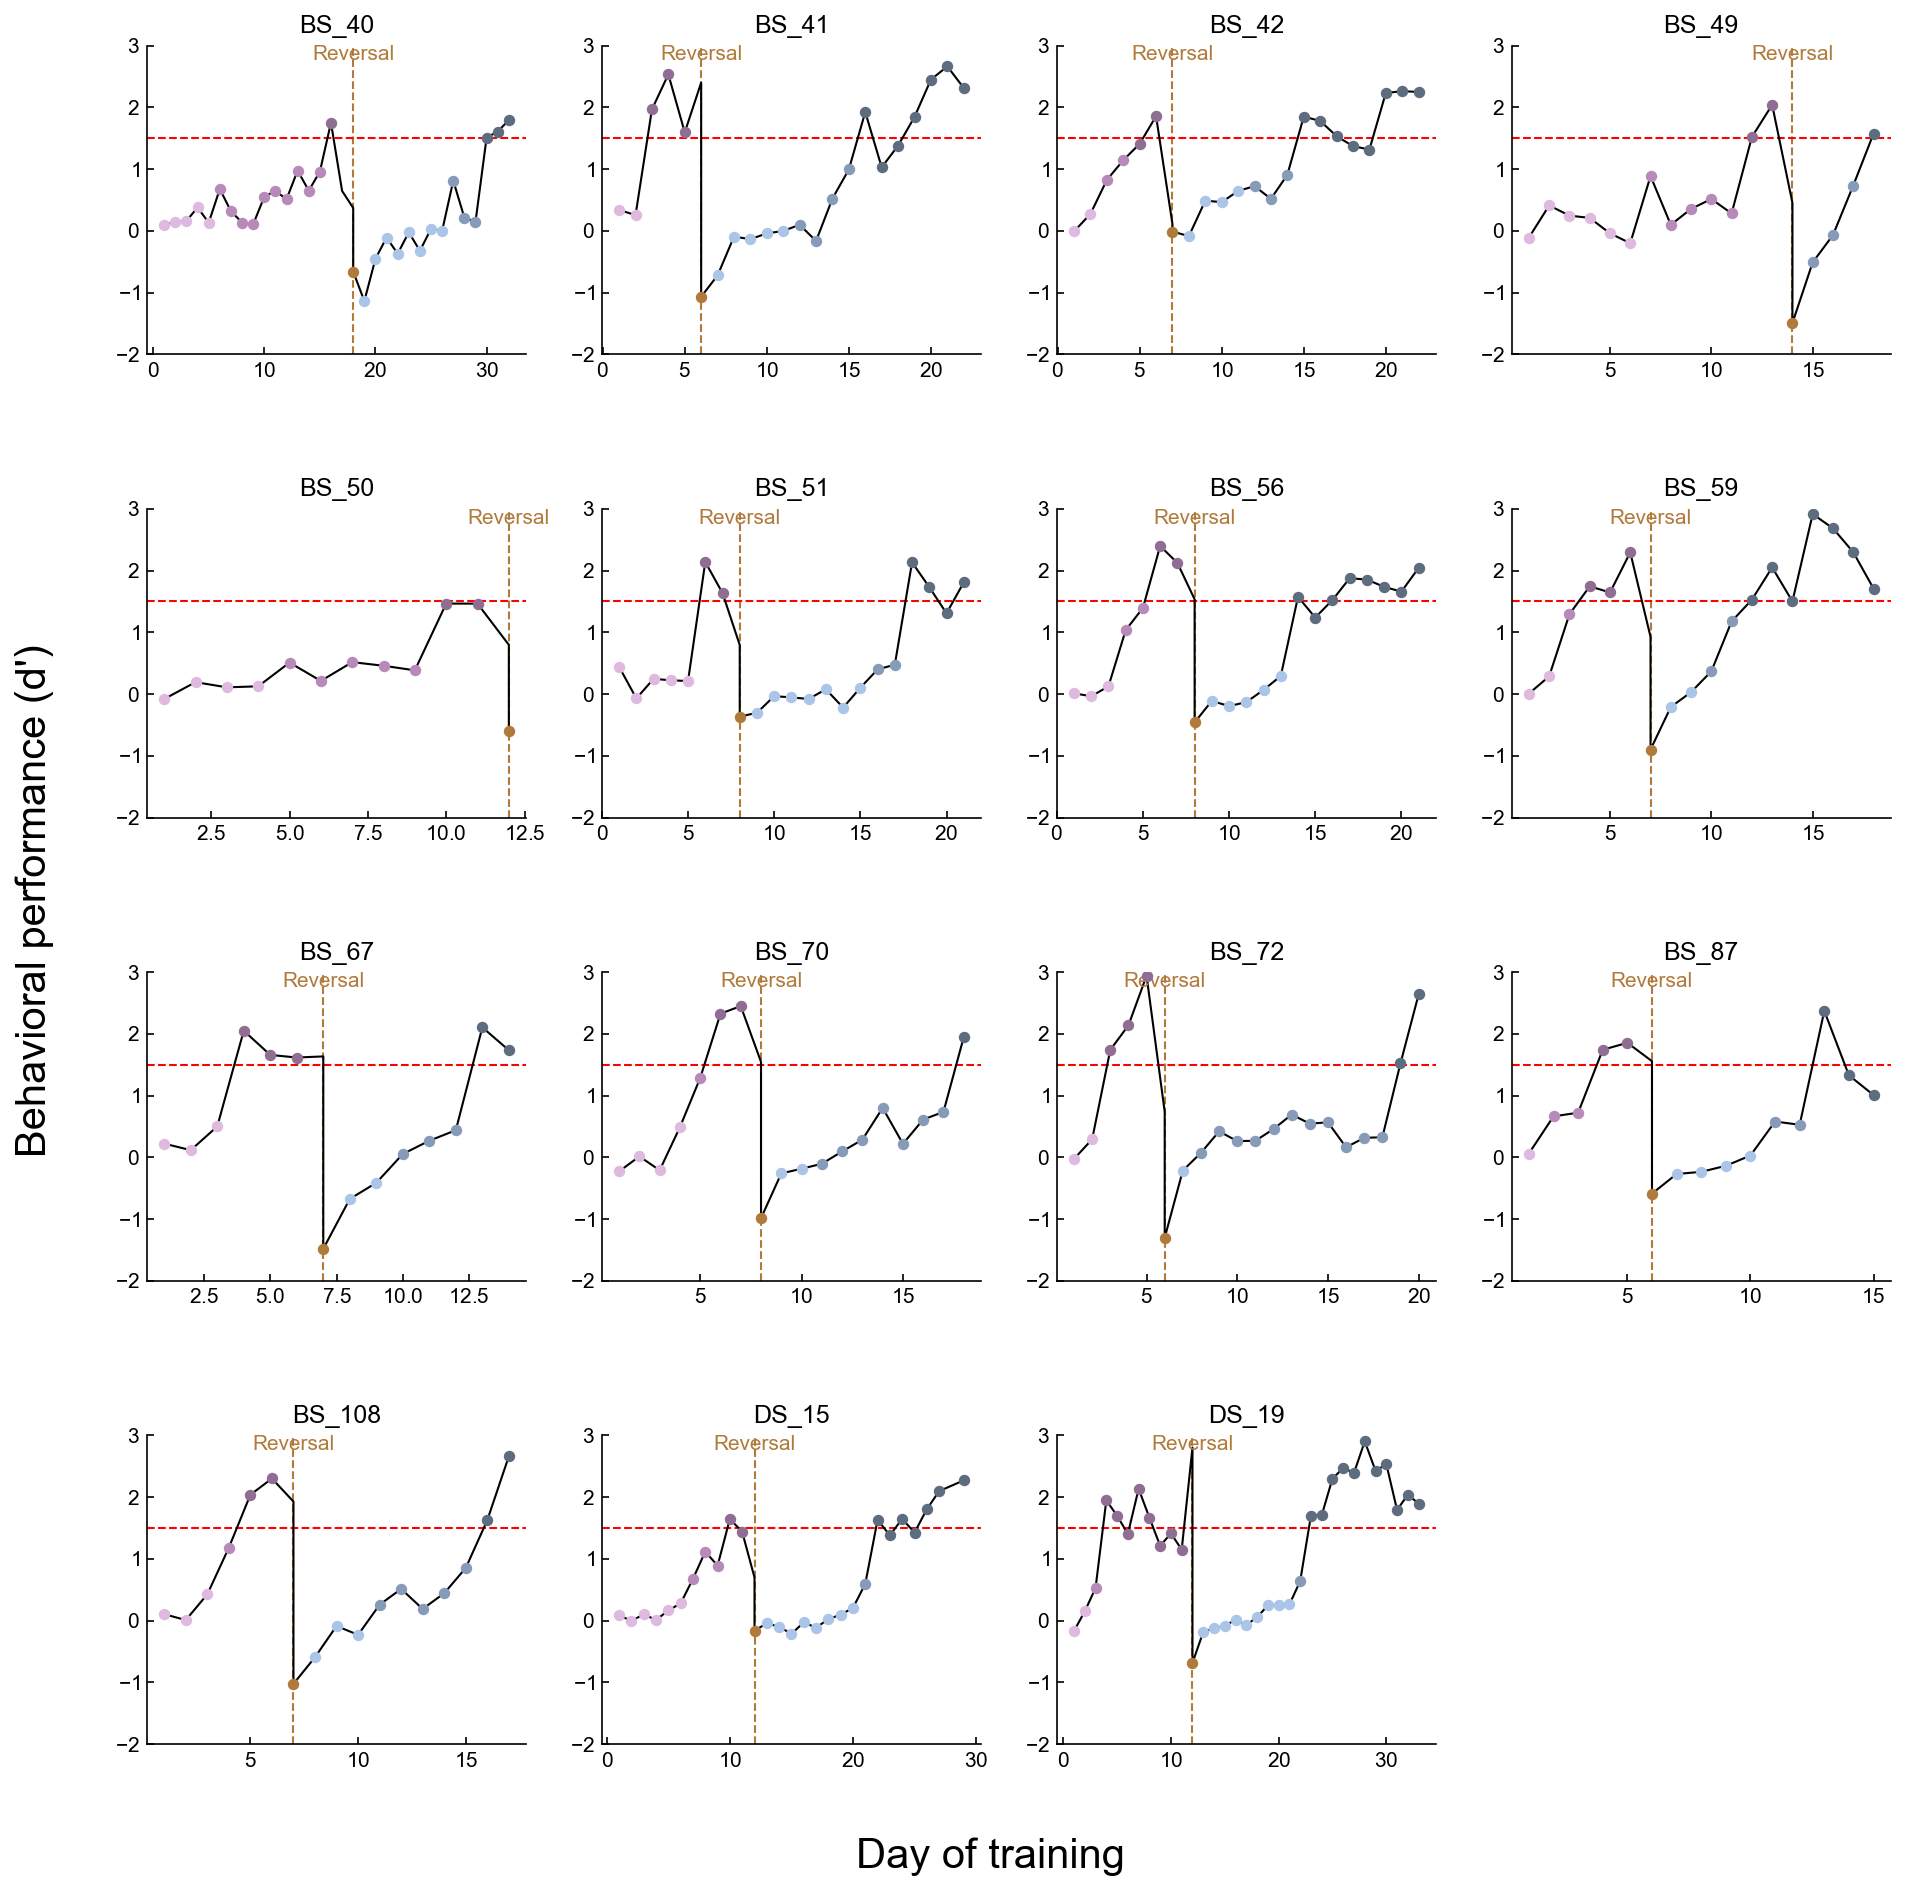

In [5]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)
#plt.savefig(os.path.join('D:\\\\TempFigures','All ephys animals learning phases.pdf'),transparent=False,facecolor="white")

In [6]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 661/661 [00:06<00:00, 108.82it/s]


In [7]:
EILphases = np.full_like(EnumSession,np.nan)
error_animals = []

for idx,session in enumerate(tqdm(EnumSession)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    try:
        animal = sessionfile.meta.animal
        day = sessionfile.meta.day_of_training
        
        if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
            EILphases[idx] = 'switch'

        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
            EILphases[idx] = 'pre early'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
            EILphases[idx] = 'pre late'
        elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
            EILphases[idx] = 'pre expert'

        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
            EILphases[idx] = 'post early'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
            EILphases[idx] = 'post late'
        elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
            EILphases[idx] = 'post expert'
    except Exception as e:
        #print(ilep.generateDateString(sessionfile))
        error_animals.append(sessionfile.meta.animal)
        pass
                             
error_animals = np.unique(error_animals)
print('errors for: '+str(error_animals))

100%|██████████| 1682/1682 [00:20<00:00, 81.68it/s] 

errors for: []


In [8]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

Ramping_preearly = []
Ramping_prelate = []
Ramping_preexpert = []
Ramping_postearly = []
Ramping_postlate = []
Ramping_postexpert = []

preearly_animals = []
prelate_animals = []
preexpert_animals = []
postearly_animals = []
postlate_animals = []
postexpert_animals = []

cellstouseFR = 'all cells'
#cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
        
    if sessionfile.responsiveness[clust]['all_trials'].FR < sessionfile.responsiveness[clust]['all_trials'].FRbaseline:
        #print('excluded')
        #continue
        pass
        
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_preearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_prelate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        prelate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_preexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preexpert_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_postearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_postlate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postlate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_postexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postexpert_animals.append(sessionfile.meta.animal)

FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

Ramping_preearly = np.array(Ramping_preearly)
Ramping_prelate = np.array(Ramping_prelate)
Ramping_preexpert = np.array(Ramping_preexpert)
Ramping_postearly = np.array(Ramping_postearly)
Ramping_postlate = np.array(Ramping_postlate)
Ramping_postexpert = np.array(Ramping_postexpert)

1682it [00:20, 81.26it/s] 


baseline = 3.5533237685317998


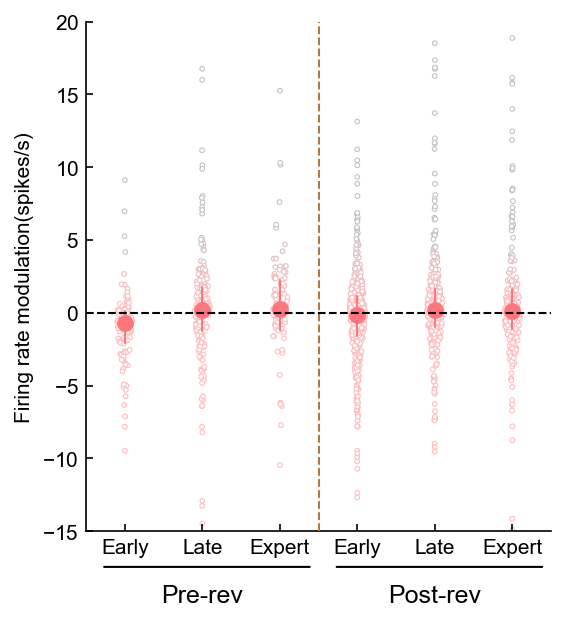

In [36]:
#Firing rate modulation graphs
size=5

FRmod_baseline_median = np.median(FRmod_preearly)
print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
data = [Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
#X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color=NCR_CR_cmap((percentCR-40)/20)
    border_color = eye_color
    
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
#     border_color=colorsys.hls_to_rgb(h,l*0.5,s)
#     print(border_color)

    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
ax.axhline(0,color='k',linestyle='--',zorder=10,lw=1)


ax.set_ylim([-15,20])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation(spikes/s)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

# #numbers
#cells
# for idx,column in enumerate(data):
#     ax.text(idx,120,str(len(column)))
# #animals
# for idx,column in enumerate(num_animal):
#     ax.text(idx,95,str(column))
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.75
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

#plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Directional ramping over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

baseline = 3.5533237685317998


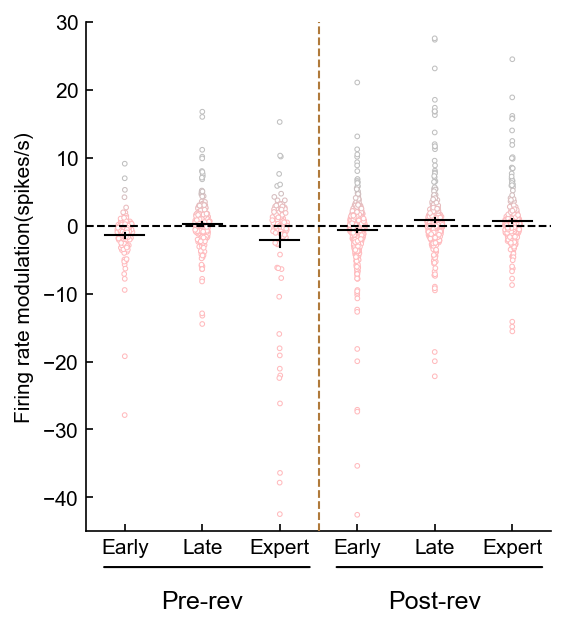

In [54]:
#Firing rate modulation graphs
size=5

FRmod_baseline_median = np.median(FRmod_preearly)
print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
data = [Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
#X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color=NCR_CR_cmap((percentCR-40)/20)
    border_color = eye_color
    
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
#     border_color=colorsys.hls_to_rgb(h,l*0.5,s)
#     print(border_color)

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
    
#     ax.scatter([idx], [mean], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    width=0.25
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
ax.axhline(0,color='k',linestyle='--',zorder=10,lw=1)


ax.set_ylim([-45,30])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Firing rate modulation(spikes/s)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

# #numbers
#cells
# for idx,column in enumerate(data):
#     ax.text(idx,120,str(len(column)))
# #animals
# for idx,column in enumerate(num_animal):
#     ax.text(idx,95,str(column))
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.75
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

#plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Directional mean ramping over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [21]:
data_dec = SimpleNamespace()
data_dec.preearly = Ramping_preearly
data_dec.prelate = Ramping_prelate
data_dec.preexpert = Ramping_preexpert
data_dec.postearly = Ramping_postearly
data_dec.postlate = Ramping_postlate
data_dec.postexpert = Ramping_postexpert
ilep.nonparametricIndependentStatsCompareToPreearly(data_dec)
pass

            Source            SS      DF          MS          F         p-unc  \
0            phase    584.267143     4.0  146.066786   5.978481  8.849731e-05   
1          context    647.224840     1.0  647.224840  26.490767  2.920217e-07   
2  phase * context    356.333898     4.0   89.083475   3.646167  5.764849e-03   
3         Residual  46640.862836  1909.0   24.432092        NaN           NaN   

        np2  
0  0.012372  
1  0.013687  
2  0.007582  
3       NaN  

          phase         A             B         p-unc        p-corr    hedges
11   post-early  baseline  experimental  3.322860e-04  4.153575e-04 -0.144012
12  post-expert  baseline  experimental  2.719358e-06  6.798396e-06 -0.474669
13    post-late  baseline  experimental  6.724535e-08  3.362268e-07 -0.449687
14   pre-expert  baseline  experimental  4.952426e-04  4.952426e-04  0.097683
15     pre-late  baseline  experimental  5.444630e-06  9.074384e-06 -0.436651


In [22]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(Ramping_preearly)
data_dec.prelate = np.abs(Ramping_prelate)
data_dec.preexpert = np.abs(Ramping_preexpert)
data_dec.postearly = np.abs(Ramping_postearly)
data_dec.postlate = np.abs(Ramping_postlate)
data_dec.postexpert = np.abs(Ramping_postexpert)
ilep.nonparametricIndependentStatsCompareToPreearly(data_dec)
pass

            Source            SS      DF          MS          F     p-unc  \
0            phase    249.809989     4.0   62.452497   3.407789  0.008726   
1          context    216.507121     1.0  216.507121  11.813949  0.000600   
2  phase * context    242.762185     4.0   60.690546   3.311646  0.010304   
3         Residual  34985.091615  1909.0   18.326397        NaN       NaN   

        np2  
0  0.007090  
1  0.006150  
2  0.006891  
3       NaN  

          phase         A             B     p-unc    p-corr    hedges
11   post-early  baseline  experimental  0.256052  0.306082 -0.066486
12  post-expert  baseline  experimental  0.120344  0.200574 -0.145562
13    post-late  baseline  experimental  0.306082  0.306082 -0.152814
14   pre-expert  baseline  experimental  0.028533  0.142667 -0.443237
15     pre-late  baseline  experimental  0.059390  0.148476 -0.102181


baseline = 3.5533237685317998


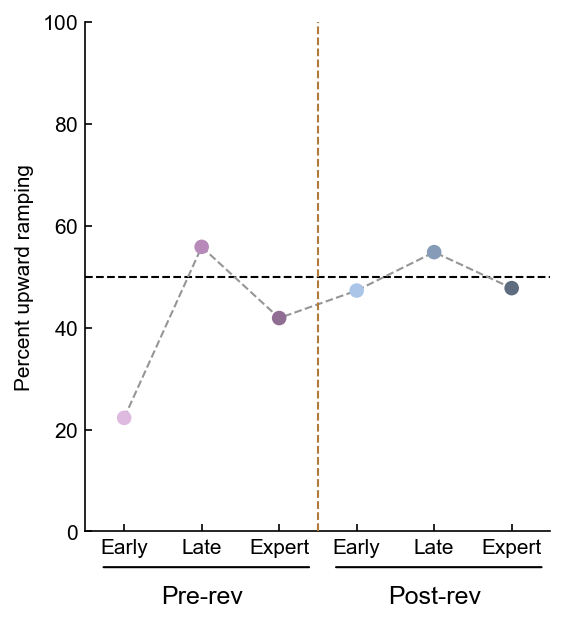

In [37]:
#Firing rate modulation graphs
size=5

FRmod_baseline_median = np.median(FRmod_preearly)
print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
data = [Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)



percent_positive = [np.mean(np.greater(d,0))*100 for d in data]
ax.plot(percent_positive,color=GOOD_GREY,linestyle='--',lw=1,zorder=-10)
ax.scatter(range(6),percent_positive,c=PHASE_COLORS)


ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
ax.axhline(50,color='k',linestyle='--',zorder=-20,lw=1)

ax.set_ylim([0,100])
ax.set_ylabel('Percent upward ramping')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())



xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+2
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

#plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Percent upward ramping V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

baseline = 1.097909963631031


<ipython-input-46-ba6c732619e4>:17: RuntimeWarning: divide by zero encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)


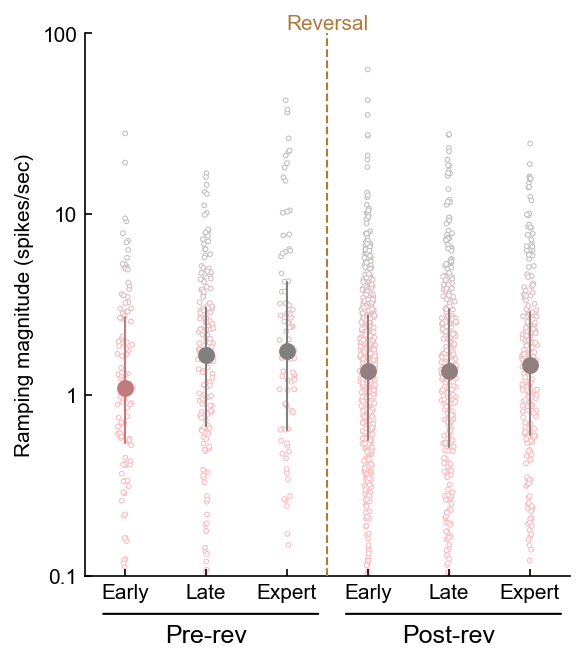

In [46]:
#Firing rate modulation graphs
size=5

Ramping_baseline_median = np.nanmedian(np.abs(Ramping_preearly))
print('baseline = '+str(Ramping_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
data = [Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert]
data = [np.abs(d) for d in data]
data = [ilep.rmnan(d) for d in data]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,Ramping_baseline_median))*100
    
    eye_color=NCR_CR_cmap((percentCR-40)/20)
    border_color = eye_color
    
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
#     border_color=colorsys.hls_to_rgb(h,l*0.5,s)
#     print(border_color)

    summary_size=50
    summary_width=1
    
    Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    
    ax.scatter([idx], [median], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
    ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')

ax.set_ylim([0.1,100])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Ramping magnitude (spikes/sec)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')
ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

#numbers
# #cells
# for idx,column in enumerate(data):
#     ax.text(idx,120,str(len(column)))
# #animals
# for idx,column in enumerate(num_animal):
#     ax.text(idx,95,str(column))

#Line for normalized ramping Mod CR threshold
#ax.axhline(0.5,linestyle='--',color=GOOD_GREY,zorder=-40,lw=1)
#ax.axhline(0.5,linestyle='--',color='k',zorder=-40,lw=1)
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, 0.054188468134356925, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
ax.text(xtick_pos_post, 0.054188468134356925, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','AC Ramping all cells over learning.pdf'),transparent=False,facecolor="white")

baseline = 1.097909963631031


<ipython-input-49-ebdc8cc40d6c>:17: RuntimeWarning: divide by zero encountered in log10
  X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)


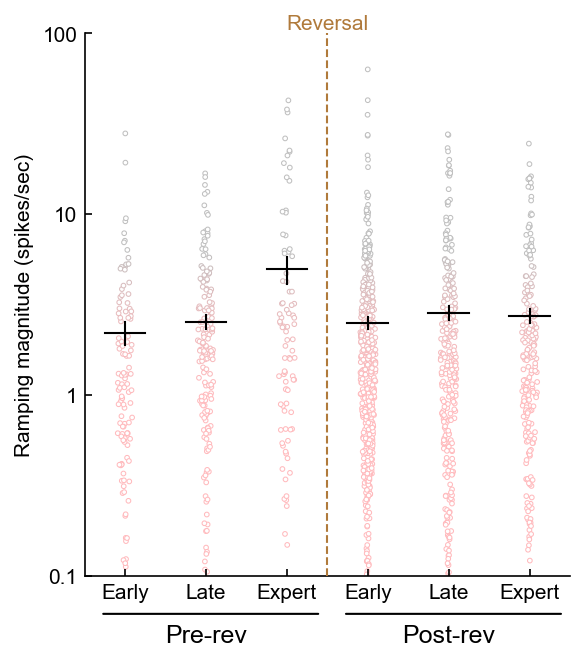

In [49]:
#Firing rate modulation graphs
size=5

Ramping_baseline_median = np.nanmedian(np.abs(Ramping_preearly))
print('baseline = '+str(Ramping_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
data = [Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert]
data = [np.abs(d) for d in data]
data = [ilep.rmnan(d) for d in data]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

_,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,Ramping_baseline_median))*100
    
    eye_color=NCR_CR_cmap((percentCR-40)/20)
    border_color = eye_color
    
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
#     border_color=colorsys.hls_to_rgb(h,l*0.5,s)
#     print(border_color)

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
    
#     ax.scatter([idx], [mean], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    width=0.25
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)

ax.set_ylim([0.1,100])
ax.set_yticks([0.1,1,10,100])
ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Ramping magnitude (spikes/sec)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

ax.text(2.5,ax.get_ylim()[1],'Reversal',color=SWITCH_COLOR,horizontalalignment='center',verticalalignment='bottom')
ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)

#numbers
# #cells
# for idx,column in enumerate(data):
#     ax.text(idx,120,str(len(column)))
# #animals
# for idx,column in enumerate(num_animal):
#     ax.text(idx,95,str(column))

#Line for normalized ramping Mod CR threshold
#ax.axhline(0.5,linestyle='--',color=GOOD_GREY,zorder=-40,lw=1)
#ax.axhline(0.5,linestyle='--',color='k',zorder=-40,lw=1)
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
ax.text(xtick_pos_pre, 0.054188468134356925, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
ax.text(xtick_pos_post, 0.054188468134356925, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','AC mean Ramping all cells over learning.pdf'),transparent=False,facecolor="white")

In [50]:
Ramping_preexpert

array([-6.17522456e+00, -1.80532594e+01, -4.24572232e+01, -3.63894014e+01,
       -1.91031963e+01, -1.04660577e+01, -2.75306667e+00,             nan,
       -3.70858667e-01,  4.73770667e-01,  1.01677538e+01,  2.67126154e+00,
        1.07544615e+00, -6.39840000e+00, -5.23323077e-01, -4.25760000e+00,
        3.19495385e+00,  3.72246154e+00,  3.19298462e+00, -1.60000000e-03,
                   nan,             nan,             nan,             nan,
       -1.60283077e+00, -1.07446154e+00,             nan,  3.21735385e+00,
                   nan, -6.48020513e-01,  1.26996923e+00, -4.08205128e-03,
       -8.16266667e-01,  2.38102564e+00, -5.74358974e-04,  1.30035000e+00,
        3.13430000e+00,  4.22494118e+00,  1.18273333e+00, -5.41253731e-01,
        2.23983750e+00,  2.46070857e+00, -8.69376000e-01,  3.89562500e-01,
        7.61148750e+00,  4.69928750e+00,  2.02937600e+00,  8.88300000e-01,
       -8.97175000e-01, -2.31111111e-03,  2.79917500e+00,  1.26978462e+00,
                   nan,  

(array([ 2.,  1.,  1.,  3.,  3.,  1.,  8., 64.,  7.,  3.]),
 array([-42.45722319, -36.68629607, -30.91536895, -25.14444183,
        -19.37351471, -13.6025876 ,  -7.83166048,  -2.06073336,
          3.71019376,   9.48112088,  15.252048  ]),
 <BarContainer object of 10 artists>)

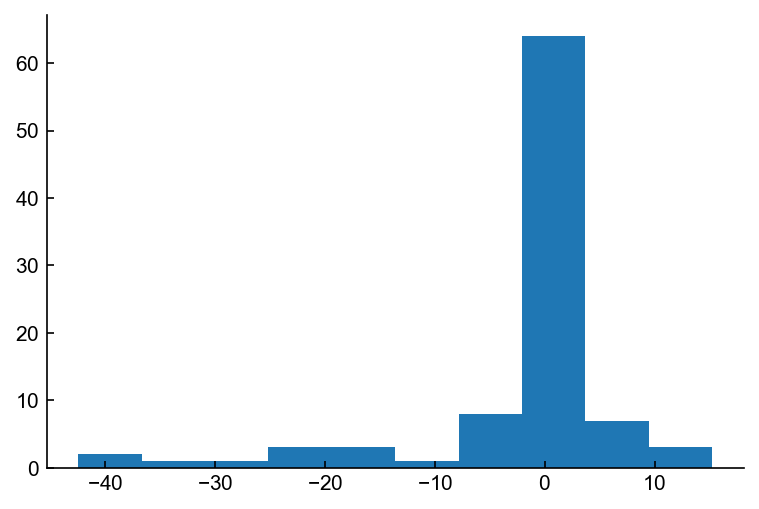

In [51]:
plt.hist(Ramping_preexpert)

In [ ]:
def synthetic_spiketrain(trial_ISIs,trial_length=2500):
    total_ISIs = np.array(trial_ISIs).flatten()
    LogISIs = []
    ctime = 0
    while True:
        ISI = np.random.choice(total_ISIs)
        ctime += 10**ISI
        if ctime <= trial_length:
            LogISIs.append(ISI)
        else:
            break
    return np.array(LogISIs)

In [61]:
total_ISIs = [1,2,3,4,5]

In [84]:
flatten([[1,2,3],[2,3,4],[1,6,2,4]])

array([1, 2, 3, 2, 3, 4, 1, 6, 2, 4])

In [74]:
np.random.choice(total_ISIs)

2

In [83]:
def flatten(responses):
    return(np.array([i for j in responses for i in j]))

# Up-Ramping cells only

In [105]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

Ramping_preearly = []
Ramping_prelate = []
Ramping_preexpert = []
Ramping_postearly = []
Ramping_postlate = []
Ramping_postexpert = []

preearly_animals = []
prelate_animals = []
preexpert_animals = []
postearly_animals = []
postlate_animals = []
postexpert_animals = []

cellstouseFR = 'all cells'
#cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
        
    if sessionfile.responsiveness[clust]['all_trials'].FR < sessionfile.responsiveness[clust]['all_trials'].FRbaseline:
        #print('excluded')
        #continue
        pass
    
    rampingMod = sessionfile.responsiveness[clust]['go'].rampingMod
    if rampingMod <= 0:
        continue
        
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_preearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_prelate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        prelate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_preexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preexpert_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_postearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_postlate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postlate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_postexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postexpert_animals.append(sessionfile.meta.animal)

FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

Ramping_preearly = np.array(Ramping_preearly)
Ramping_prelate = np.array(Ramping_prelate)
Ramping_preexpert = np.array(Ramping_preexpert)
Ramping_postearly = np.array(Ramping_postearly)
Ramping_postlate = np.array(Ramping_postlate)
Ramping_postexpert = np.array(Ramping_postexpert)

1682it [00:21, 76.52it/s] 


baseline = 3.595302619692863


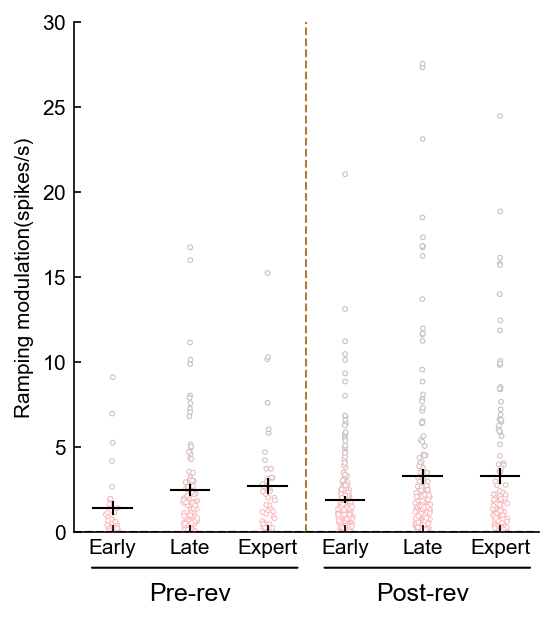

In [100]:
#Firing rate modulation graphs
size=5

FRmod_baseline_median = np.median(FRmod_preearly)
print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
data = [Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
#X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color=NCR_CR_cmap((percentCR-40)/20)
    border_color = eye_color
    
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
#     border_color=colorsys.hls_to_rgb(h,l*0.5,s)
#     print(border_color)

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
    
#     ax.scatter([idx], [mean], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    width=0.25
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
ax.axhline(0,color='k',linestyle='--',zorder=10,lw=1)


ax.set_ylim([0,30])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Ramping modulation(spikes/s)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

# #numbers
#cells
# for idx,column in enumerate(data):
#     ax.text(idx,120,str(len(column)))
# #animals
# for idx,column in enumerate(num_animal):
#     ax.text(idx,95,str(column))
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.75
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

#plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Up-ramping cells over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [106]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(Ramping_preearly)
data_dec.prelate = np.abs(Ramping_prelate)
data_dec.preexpert = np.abs(Ramping_preexpert)
data_dec.postearly = np.abs(Ramping_postearly)
data_dec.postlate = np.abs(Ramping_postlate)
data_dec.postexpert = np.abs(Ramping_postexpert)
ilep.nonparametricIndependentStatsCompareToOwnEarly(data_dec)
pass

            Source            SS     DF          MS          F         p-unc  \
0            phase     67.162641    3.0   22.387547   2.094841  9.927707e-02   
1          context    402.722048    1.0  402.722048  37.683384  1.199062e-09   
2  phase * context      1.964984    3.0    0.654995   0.061289  9.801390e-01   
3         Residual  10665.618758  998.0   10.686993        NaN           NaN   

        np2  
0  0.006258  
1  0.036385  
2  0.000184  
3       NaN  

          phase         A             B     p-unc    p-corr    hedges
7   post-expert  baseline  experimental  0.013026  0.017368 -0.444814
8     post-late  baseline  experimental  0.064547  0.064547 -0.376981
9    pre-expert  baseline  experimental  0.000967  0.003867 -0.492130
10     pre-late  baseline  experimental  0.005515  0.011031 -0.379946


# Down-Ramping cells only

In [101]:
FRmod_preearly = []
FRmod_prelate = []
FRmod_preexpert = []
FRmod_postearly = []
FRmod_postlate = []
FRmod_postexpert = []

Ramping_preearly = []
Ramping_prelate = []
Ramping_preexpert = []
Ramping_postearly = []
Ramping_postlate = []
Ramping_postexpert = []

preearly_animals = []
prelate_animals = []
preexpert_animals = []
postearly_animals = []
postlate_animals = []
postexpert_animals = []

cellstouseFR = 'all cells'
#cellstouseFR = 'task encoders'

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    #Currently not active as tuning curve animals have not been decoded
    if cellstouseFR == 'task encoders':
        if not np.isfinite(accuracies[idx]) or pvals[idx] > 0.05 or accuracies[idx] < task_encoder_threshold:
            continue
        
    if sessionfile.responsiveness[clust]['all_trials'].FR < sessionfile.responsiveness[clust]['all_trials'].FRbaseline:
        #print('excluded')
        #continue
        pass
    
    rampingMod = sessionfile.responsiveness[clust]['go'].rampingMod
    if rampingMod >= 0:
        continue
        
    if EILphases[idx] == 'pre early':
        FRmod_preearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_preearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre late':
        FRmod_prelate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_prelate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        prelate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'pre expert':
        FRmod_preexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_preexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        preexpert_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post early':
        FRmod_postearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_postearly.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postearly_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post late':
        FRmod_postlate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_postlate.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postlate_animals.append(sessionfile.meta.animal)
    elif EILphases[idx] == 'post expert':
        FRmod_postexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
        Ramping_postexpert.append(sessionfile.responsiveness[clust]['go'].rampingMod)
        postexpert_animals.append(sessionfile.meta.animal)

FRmod_preearly = np.array(FRmod_preearly)
FRmod_prelate = np.array(FRmod_prelate)
FRmod_preexpert = np.array(FRmod_preexpert)
FRmod_postearly = np.array(FRmod_postearly)
FRmod_postlate = np.array(FRmod_postlate)
FRmod_postexpert = np.array(FRmod_postexpert)

Ramping_preearly = np.array(Ramping_preearly)
Ramping_prelate = np.array(Ramping_prelate)
Ramping_preexpert = np.array(Ramping_preexpert)
Ramping_postearly = np.array(Ramping_postearly)
Ramping_postlate = np.array(Ramping_postlate)
Ramping_postexpert = np.array(Ramping_postexpert)

1682it [00:21, 78.84it/s] 


baseline = 4.396135265700484


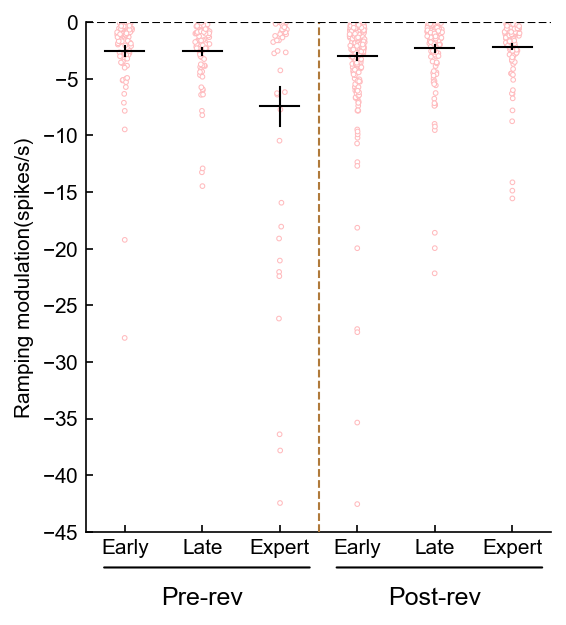

In [102]:
#Firing rate modulation graphs
size=5

FRmod_baseline_median = np.median(FRmod_preearly)
print('baseline = '+str(FRmod_baseline_median))

fig, ax = plt.subplots(figsize=(4,4.5))
data = [Ramping_preearly,Ramping_prelate,Ramping_preexpert,Ramping_postearly,Ramping_postlate,Ramping_postexpert]
labels = ['Early','Late','Expert','Early','Late','Expert']
numCon = len(data)

X = [np.ones(len(l))*idx for idx,l in enumerate(data)]

X,Y = ilep.violin(np.concatenate(X),np.concatenate(data),width=0.25)
#X,_ = ilep.violin(np.concatenate(X),np.log10(np.concatenate(data)),width=0.25)
colors = NCR_CR_cmap((Y-1)/5)

ax.scatter(X, Y, s=size, ec=colors, fc='white', lw=0.5,zorder=-10)
#ax.set_yscale('log',subs=[])

#Plot summary
for idx,column in enumerate(data):
    column = ilep.rmnan(column)
    percentCR = np.nanmean(np.greater(column,FRmod_baseline_median))*100
    
    eye_color=NCR_CR_cmap((percentCR-40)/20)
    border_color = eye_color
    
#     r,g,b = mpl.colors.to_rgb(eye_color)
#     h,l,s = colorsys.rgb_to_hls(r,g,b)
#     border_color=colorsys.hls_to_rgb(h,l*0.5,s)
#     print(border_color)

    summary_size=50
    summary_width=1
    
    #Q1, median, Q3 = (np.percentile(column, q) for q in [25, 50, 75])
    mean = np.mean(column)
    SEM = sem(column)
    Q1 = mean-SEM
    Q3 = mean+SEM
    
#     ax.scatter([idx], [mean], ec=border_color,fc=eye_color, s=summary_size,lw=summary_width, zorder=10)
#     ax.plot([idx, idx], [Q1, Q3], c=border_color, lw=summary_width, zorder=9, solid_capstyle='round')
    
    width=0.25
    ax.plot([idx-width,idx+width],[mean]*2,color='k',lw=1)
    ax.plot([idx]*2,[mean-SEM,mean+SEM],color='k',lw=1)

ax.axvline(2.5,color=SWITCH_COLOR,linestyle='--',zorder=10,lw=1)
ax.axhline(0,color='k',linestyle='--',zorder=10,lw=1)


ax.set_ylim([-45,0])
#ax.set_yticks([0.1,1,10,100])
#ax.set_yticklabels(['0.1','1','10','100'])
ax.set_ylabel('Ramping modulation(spikes/s)')

ax.set_xlim([-0.5,5.5])
ax.set_xticks(range(numCon))
ax.set_xticklabels(labels)
ax.set_xlim(ax.get_xlim())

# #numbers
#cells
# for idx,column in enumerate(data):
#     ax.text(idx,120,str(len(column)))
# #animals
# for idx,column in enumerate(num_animal):
#     ax.text(idx,95,str(column))
    
ax.fill_between(ax.get_xlim(),[ax.get_ylim()[0]]*2,[ax.get_ylim()[1]]*2,color='white',alpha=0.5,zorder=-5)

xtick_pos_pre = ax.get_xticks()[1]
xtick_pos_post = ax.get_xticks()[4]
Yval = ilep.getPrePostLabelYval(ax.get_ylim())+0.75
t1 = ax.text(xtick_pos_pre, Yval, 'Pre-rev', ha='center', va='top', fontsize=12,color='k')
t2 = ax.text(xtick_pos_post, Yval, 'Post-rev', ha='center', va='top',  fontsize=12,color='k')
ax.annotate('', xy=(0.03, -0.07), xycoords='axes fraction', xytext=(0.49, -0.07),arrowprops=dict(arrowstyle='-', color='k'))
ax.annotate('', xy=(0.53, -0.07), xycoords='axes fraction', xytext=(0.99, -0.07),arrowprops=dict(arrowstyle='-', color='k'))

#plt.tight_layout()
fig.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Down-ramping cells over learning V'+str(current_version)+'.pdf'),transparent=False,facecolor="white")

In [103]:
data_dec = SimpleNamespace()
data_dec.preearly = np.abs(Ramping_preearly)
data_dec.prelate = np.abs(Ramping_prelate)
data_dec.preexpert = np.abs(Ramping_preexpert)
data_dec.postearly = np.abs(Ramping_postearly)
data_dec.postlate = np.abs(Ramping_postlate)
data_dec.postexpert = np.abs(Ramping_postexpert)
ilep.nonparametricIndependentStatsCompareToPreearly(data_dec)
pass

            Source            SS      DF          MS         F     p-unc  \
0            phase    398.626881     4.0   99.656720  4.320617  0.001800   
1          context     92.827727     1.0   92.827727  4.024546  0.045098   
2  phase * context    627.682697     4.0  156.920674  6.803295  0.000021   
3         Residual  24333.989663  1055.0   23.065393       NaN       NaN   

        np2  
0  0.016117  
1  0.003800  
2  0.025146  
3       NaN  

          phase         A             B     p-unc    p-corr    hedges
11   post-early  baseline  experimental  0.703117  0.703117 -0.091660
12  post-expert  baseline  experimental  0.458985  0.587871  0.113442
13    post-late  baseline  experimental  0.334966  0.587871  0.060799
14   pre-expert  baseline  experimental  0.470297  0.587871 -0.663888
15     pre-late  baseline  experimental  0.403787  0.587871 -0.017000
